In [24]:
import pandas as pd
from datetime import datetime
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numeritos as nitos
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
import os
import pickle
import eli5
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luismi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
os.getcwd()

'/Users/luismi/Documents/Proyectos/Twitter_scrap/Proyecto_twitter/notebook'

In [7]:
model=pickle.load( open('../model/sentiment_model', "rb" ) )


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator Pipeline from version 1.0.2 when using versio

In [8]:
model


Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [14]:
connection = sqlite3.connect("../data/twitter.db")
crsr = connection.cursor()
query = '''
SELECT * FROM TWEETS
;
'''
df_tweets = sql_query(query)
df_tweets.head()

,Content,Content_id,Retweet_count,Reply,Likes,Followers,Quote
0,recordar que la seman que vien ten la primer q...,1577334577701453827,2,0,12,827,0
1,el desarroll web es uno de los perfil mas dema...,1576902991507922944,3,0,3,121,0
2,@jorgegrev @thebridge_tech enhorabuen crack!,1576846293179457536,0,0,1,554,0
3,hoy por fin ve la luz mi prim cas study public...,1575217357105946624,3,0,4,59,0
4,¿er o quier ser talent it y estas en españa? 🇪...,1574849353172373504,1,1,2,208,0


Abrimos modelo precargado

In [15]:
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df_tweets['Content'] = df_tweets['Content'].apply(spanish_stemmer)
df_tweets['Content'].head()

0    record que la sem que vien ten la prim qued #c...
1    el desarroll web es uno de los perfil mas dema...
2           @jorgegrev @thebridge_tech enhorabu crack!
3    hoy por fin ve la luz mi prim cas study public...
4    ¿er o qui ser talent it y estas en españa? 🇪🇸 ...
Name: Content, dtype: object

In [25]:
df_tweets['Content'] = df_tweets['Content'].apply(lambda x: nitos.clean_emoji(x))
def remove_links(text):
    return " ".join([' ' if ('http') in word else word for word in text.split()])

df_tweets['Content'] = df_tweets['Content'].apply(lambda x: remove_links(x))
def remove_stopwords(text, language):
    stop = stopwords.words(language)
    return ' '.join([word for word in text.split() if word not in (stop)])

df_tweets['Content'] = df_tweets['Content'].apply(lambda x: remove_stopwords(x, 'spanish'))
def remove_mentions(text):
    return re.sub(r"\@\w+[,]|\@\w+|[,]\@\w+", " ", text)

df_tweets['Content'] = df_tweets['Content'].apply(lambda x: remove_mentions(x))
def signs_tweets(text, signs):
    return signs.sub(' ', text.lower())

signs = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\¡)")

df_tweets['Content'] = df_tweets['Content'].apply(lambda x: signs_tweets(x, signs))
def remove_hash(text):
    return re.sub(r"\#\w+[,]|\#\w+|[,]\#\w+", "", text)

df_tweets['Content'] = df_tweets['Content'].apply(lambda x: remove_hash(x))
def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df_tweets['Content'] = df_tweets['Content'].apply(lambda x: spanish_stemmer(x))
df_tweets['Content']= df_tweets['Content'].apply(lambda x: nitos.clean_emoji(x))

In [27]:
df_tweets.head()

,Content,Content_id,Retweet_count,Reply,Likes,Followers,Quote,Result
0,record sem vien ten prim qued madr tendr gran ...,1577334577701453827,2,0,12,827,0,1
1,desarroll web perfil mas demand merc laboral d...,1576902991507922944,3,0,3,121,0,1
2,enhorabu crack,1576846293179457536,0,0,1,554,0,0
3,hoy fin ve luz prim cas study public trabaj in...,1575217357105946624,3,0,4,59,0,1
4,er qui ser talent it españ si respuest si cont...,1574849353172373504,1,1,2,208,0,1


In [30]:
model[1].n_features_in_
feature_names = model[0].get_feature_names()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [35]:
feature_namesmodel_feat = model[1]
model_feat = model[1]
importance = model_feat.coef_[0]
feat_importances = pd.Series(importance, index = feature_names)

<AxesSubplot:title={'center':'Feature Importance'}>

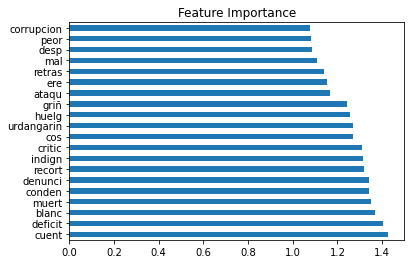

In [36]:
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')


In [38]:
predict_df = df_tweets['Content']


In [39]:
predictions = model.predict(predict_df)
predictions_prob = model.predict_proba(predict_df)

In [40]:
sentiment1 = [i[0] for i in predictions_prob]
sentiment2 = [i[1] for i in predictions_prob]

In [41]:
df_tweets['sentiment'] = predictions
df_tweets['sentiment1'] = sentiment1
df_tweets['sentiment2'] = sentiment2

In [42]:
df_tweets.head()


,Content,Content_id,Retweet_count,Reply,Likes,Followers,Quote,Result,sentiment,sentiment1,sentiment2
0,record sem vien ten prim qued madr tendr gran ...,1577334577701453827,2,0,12,827,0,1,0,0.590445,0.409555
1,desarroll web perfil mas demand merc laboral d...,1576902991507922944,3,0,3,121,0,1,0,0.705783,0.294217
2,enhorabu crack,1576846293179457536,0,0,1,554,0,0,0,0.547459,0.452541
3,hoy fin ve luz prim cas study public trabaj in...,1575217357105946624,3,0,4,59,0,1,1,0.340805,0.659195
4,er qui ser talent it españ si respuest si cont...,1574849353172373504,1,1,2,208,0,1,1,0.135822,0.864178
